In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
from scipy import stats
from scipy.stats import fisher_exact
from scipy.stats import f_oneway

In [2]:
#Importation de notre Dataframe
df= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
#Affichage de notre Dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Supprimer la catégorie "Other" du DataFrame
df = df[df['gender'] != 'Other']
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [5]:
#Affichage des variables categorielles
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [6]:
#Noms de colonnes avec le nombre de valeurs quantitatives ou qualitatives(si sup à 3 c'est Quantitativ sinon Qualitativ)
liste_colonnes=df.columns
print(liste_colonnes)
df.nunique()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


id                   5109
gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
# Nomination des variables qualitatives et quantitatives
variables_quantitatives= ['age', 'avg_glucose_level', 'bmi']
variables_qualitatives= ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke']

In [8]:
# Affichage des colonnes object
total_df = df.describe(include='object')
total_df

,gender,ever_married,work_type,Residence_type,smoking_status
count,5109,5109,5109,5109,5109
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,1892


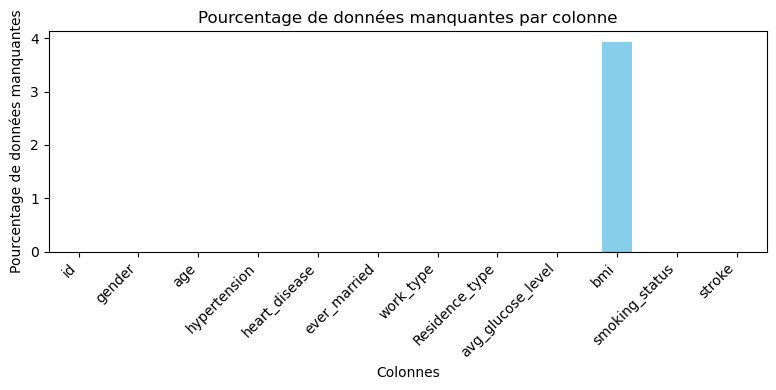

In [9]:
# Calculer le pourcentage de données manquantes par colonne
pourcentage_manquant_par_colonne = (df.isnull().sum() / len(df)) * 100

# Créer le graphique à barres
plt.figure(figsize=(8, 4))
pourcentage_manquant_par_colonne.plot(kind='bar', color='skyblue')
plt.title('Pourcentage de données manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de données manquantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Affichage de colonnes avec de données numériques
total_df = df.describe()
total_df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


* **id** : identifiant unique.  
* **gender** : genre du patient.  
* **age** : âge du patient.  
* **hypertension** : 0 si le patient n'a pas d'hypertension, 1 si le patient a de l'hypertension.  
* **heart_disease** : 0 si le patient n'a pas de maladie cardiaque, 1 si le patient a une maladie cardiaque.  
* **ever_married** : si le patient a déjà été marié ou pas.  
* **work_type** : type de travail du patient.  
* **Residence_type** : type de résidence du patient *"Rural"* ou *"Urbain"*.  
* **avg_glucose_level** : taux moyen de glucose dans le sang.  
* **bmi** : indice de masse corporelle.  
* **smoking_status** : *"a déjà fumé"*, *"n'a jamais fumé"*, *"fumé"* ou *"Inconnu"*.  
* **stroke** : 1 si le patient a eu un accident vasculaire cérébral ou 0 s'il n'en a pas eu.  

# Analyse univariée pour les variables quantitatives :

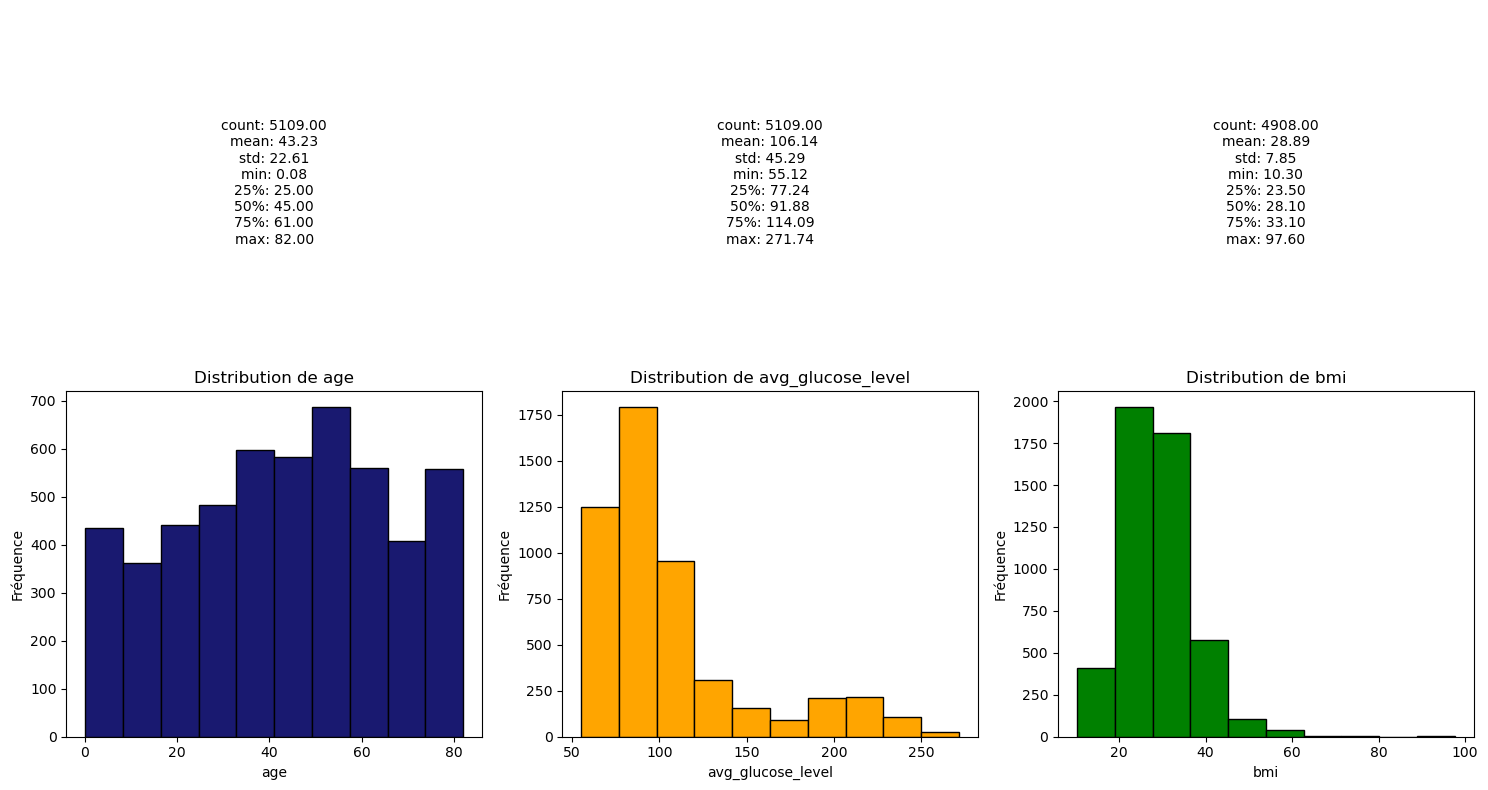

In [11]:
# Liste des variables quantitatives (Graph à barres)
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(2, len(variables_quantitatives), figsize=(15, 8))

# Boucle pour générer les graphiques pour chaque variable + histogrammes
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):

    axes[1, i].hist(df[variable], bins=10, color=color, edgecolor='black')
    axes[1, i].set_title(f'Distribution de {variable}')
    axes[1, i].set_xlabel(variable)
    axes[1, i].set_ylabel('Fréquence')

# Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])

# Ajout des statistiques descriptives au-dessus du leur graphique
    axes[0, i].text(0.5, 0.5, stats_text, fontsize=10, ha='center', va='center', transform=axes[0, i].transAxes)
    axes[0, i].axis('off')
    
plt.tight_layout()
plt.show()

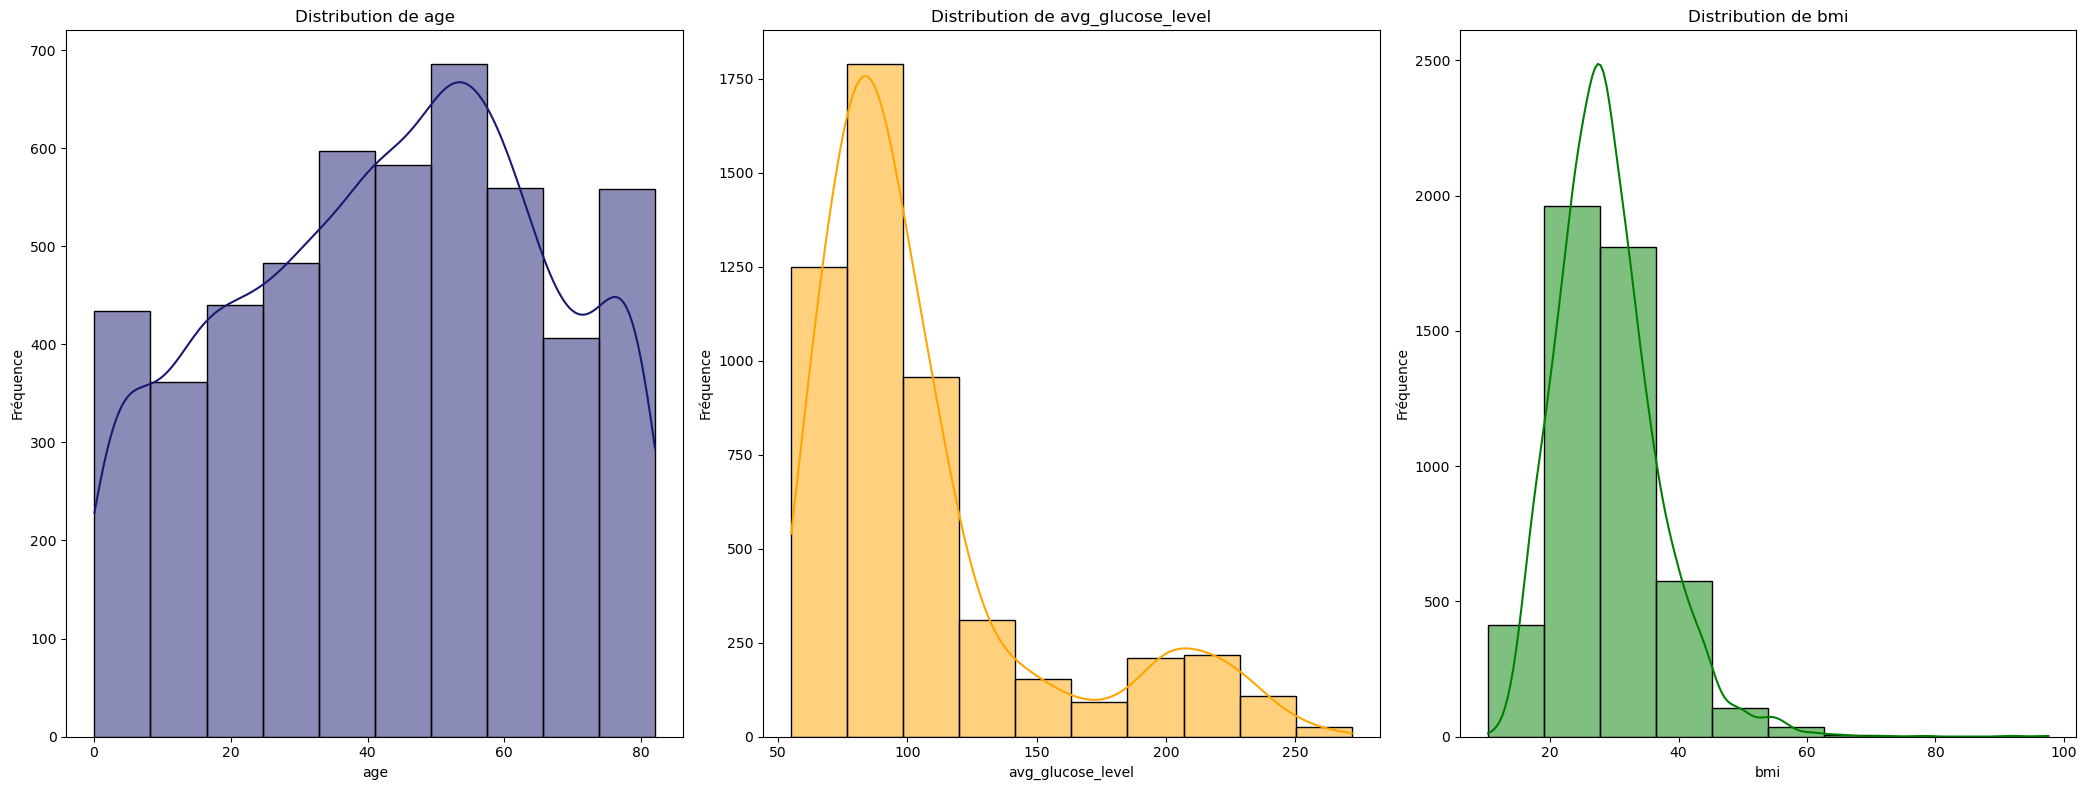

In [12]:
# Ignorer les avertissements de FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Liste des variables quantitatives
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(21, 8))

# Boucle pour générer les graphiques pour chaque variable + histogrammes - KDE
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Distribution avec Seaborn
    sns.histplot(df[variable], bins=10, color=color, ax=axes[i], edgecolor='black', kde = True)
    axes[i].set_title(f'Distribution de {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Fréquence')

    # Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])
    
plt.tight_layout()
plt.show()

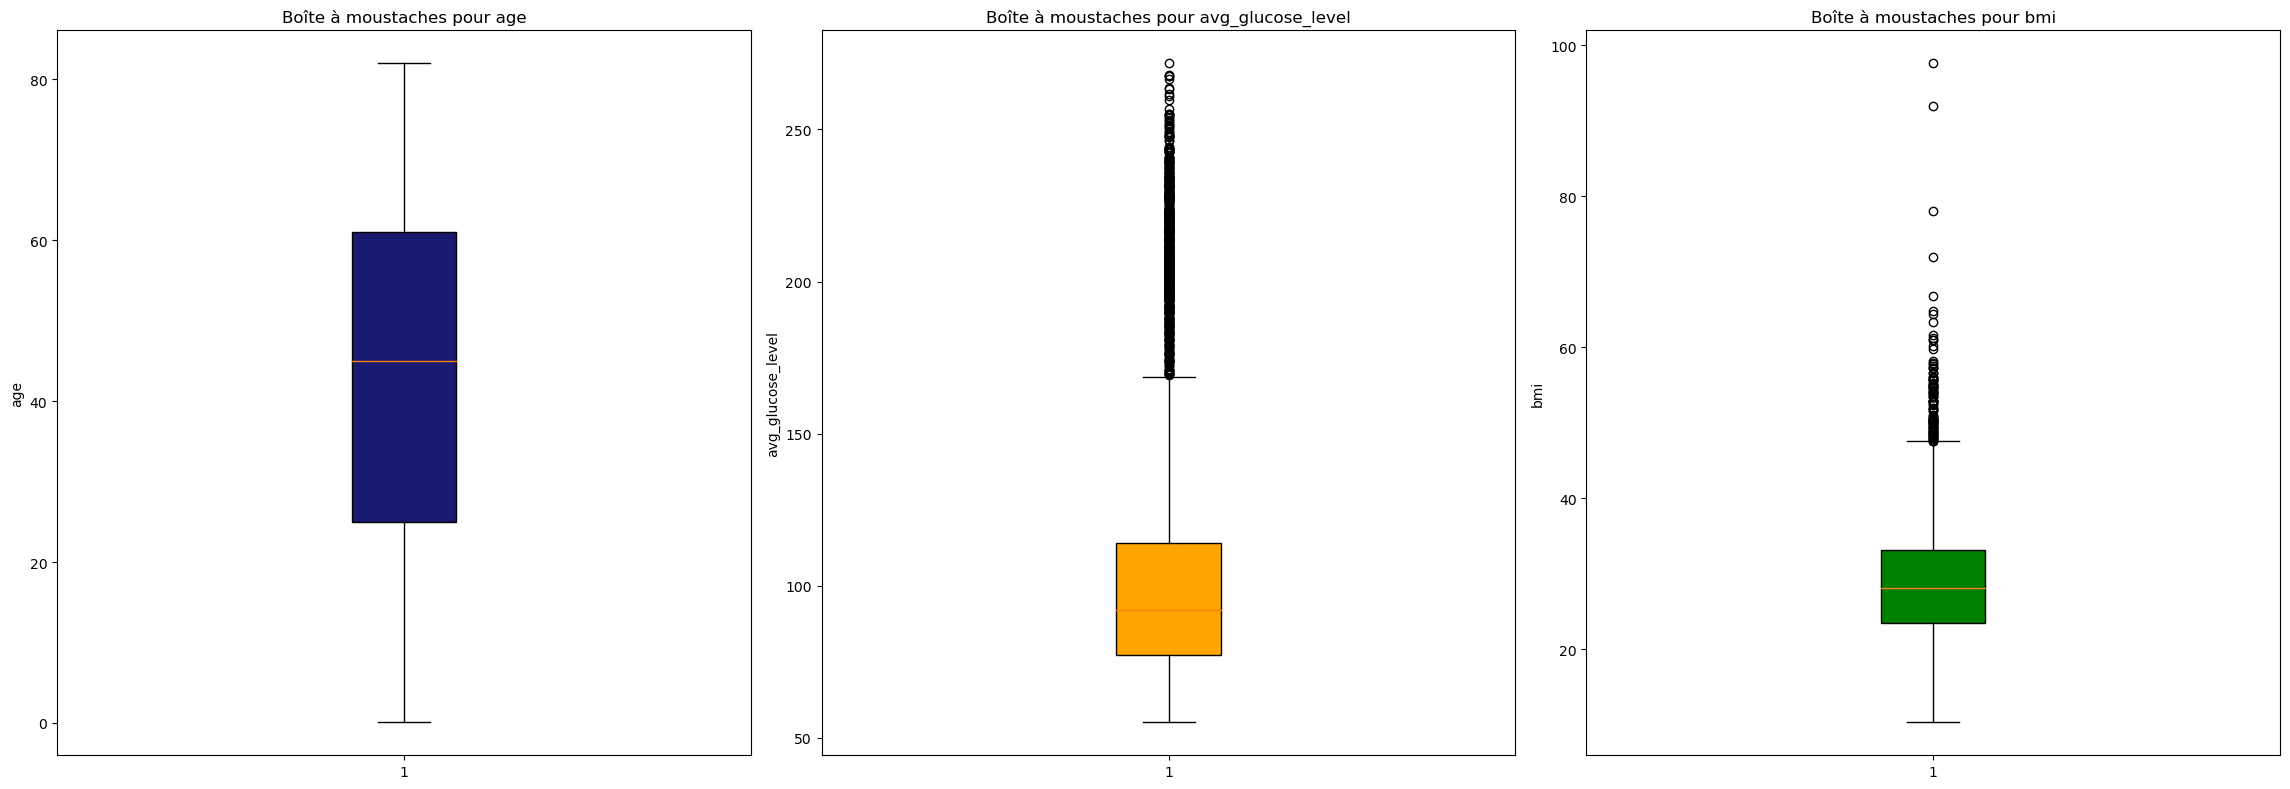

In [31]:
# Liste des variables quantitatives (Graph à moustaches)
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(23, 8))

# Boucle pour générer les graphiques pour chaque variable + boîtes à moustaches
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Boîte à moustaches
    if variable == 'bmi':
        indice_masse_corporelle = df[variable].dropna()
        axes[i].boxplot(indice_masse_corporelle, showfliers=True, patch_artist=True, boxprops=dict(facecolor=color))
    else:
        axes[i].boxplot(df[variable], patch_artist=True, boxprops=dict(facecolor=color))
    axes[i].set_title(f'Boîte à moustaches pour {variable}')
    axes[i].set_ylabel(variable)

# Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])

plt.tight_layout()
plt.show()


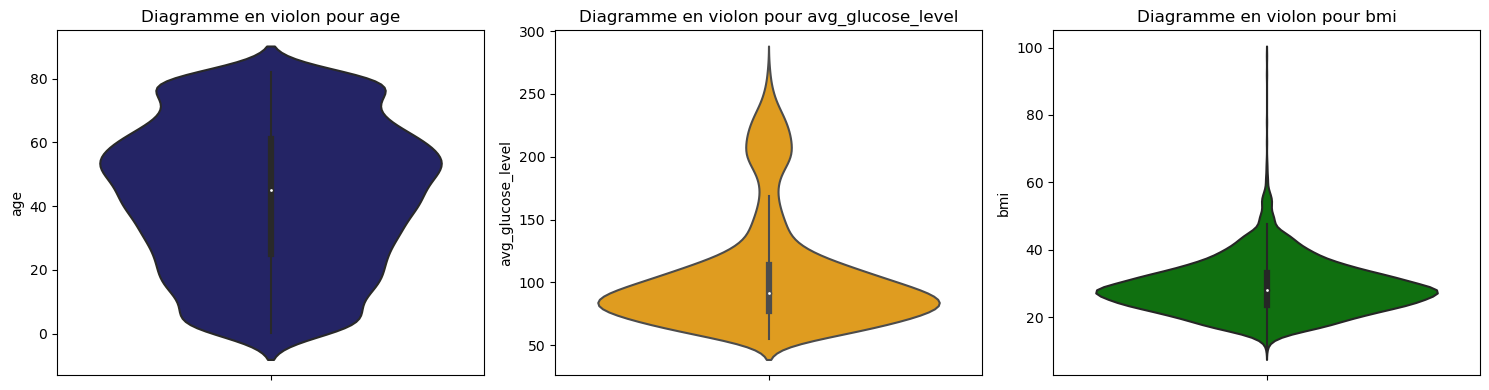

In [32]:
# Liste des variables quantitatives
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(15, 4))

# Boucle pour générer les diagrammes en violon pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Diagramme en violon
    sns.violinplot(data=df, y=variable, ax=axes[i], color=color)
    axes[i].set_title(f'Diagramme en violon pour {variable}')
    axes[i].set_ylabel(variable)

plt.tight_layout()
plt.show()

# Analyse univariée pour les variables qualitatives 

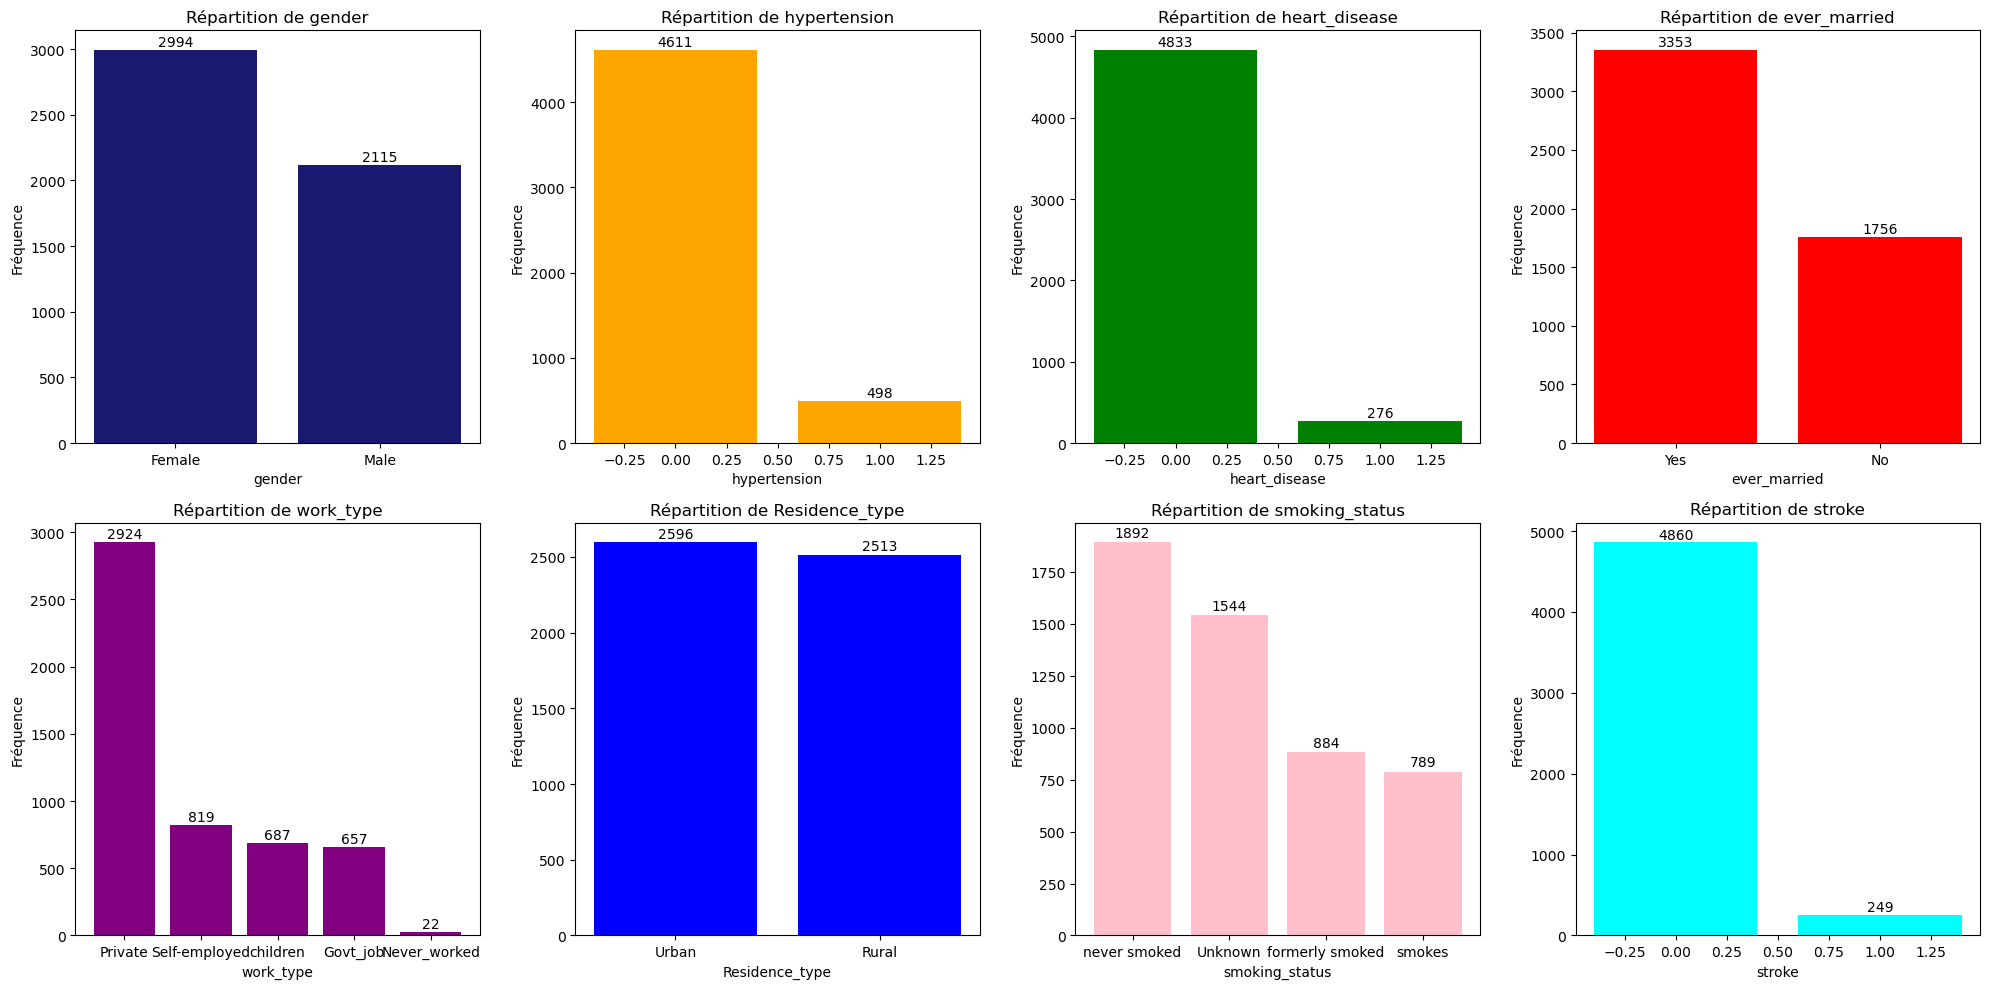

In [33]:
variables_qualitatives = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
colors = ['midnightblue', 'orange', 'green', 'red', 'purple', 'blue', 'pink', 'cyan']

# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_per_row = 4  # Quatre graphiques par ligne
num_rows = (num_total_variables + num_graphs_per_row - 1) // num_graphs_per_row

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_graphs_per_row, figsize=(20, num_rows*5))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en barres
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors)):
    # Compter les occurrences de chaque catégorie
    counts = df[variable].value_counts()

    # Identifier les sous-graphiques
    row = i // num_graphs_per_row
    col = i % num_graphs_per_row

    # Diagramme en barres
    ax = axes[row, col]
    ax.bar(counts.index, counts.values, color=color)
    ax.set_title(f'Répartition de {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Fréquence')

    # Ajout des valeurs au-dessus des barres
    for j, count in enumerate(counts.values):
        ax.text(j, count + 10, str(count), ha='center', va='bottom')

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(hspace=0.7, wspace=0.5)

plt.tight_layout()
plt.show()

In [34]:
df_patient_avc = df.loc[df['stroke'] == 1,:]
df_patient_avc.shape

(249, 12)

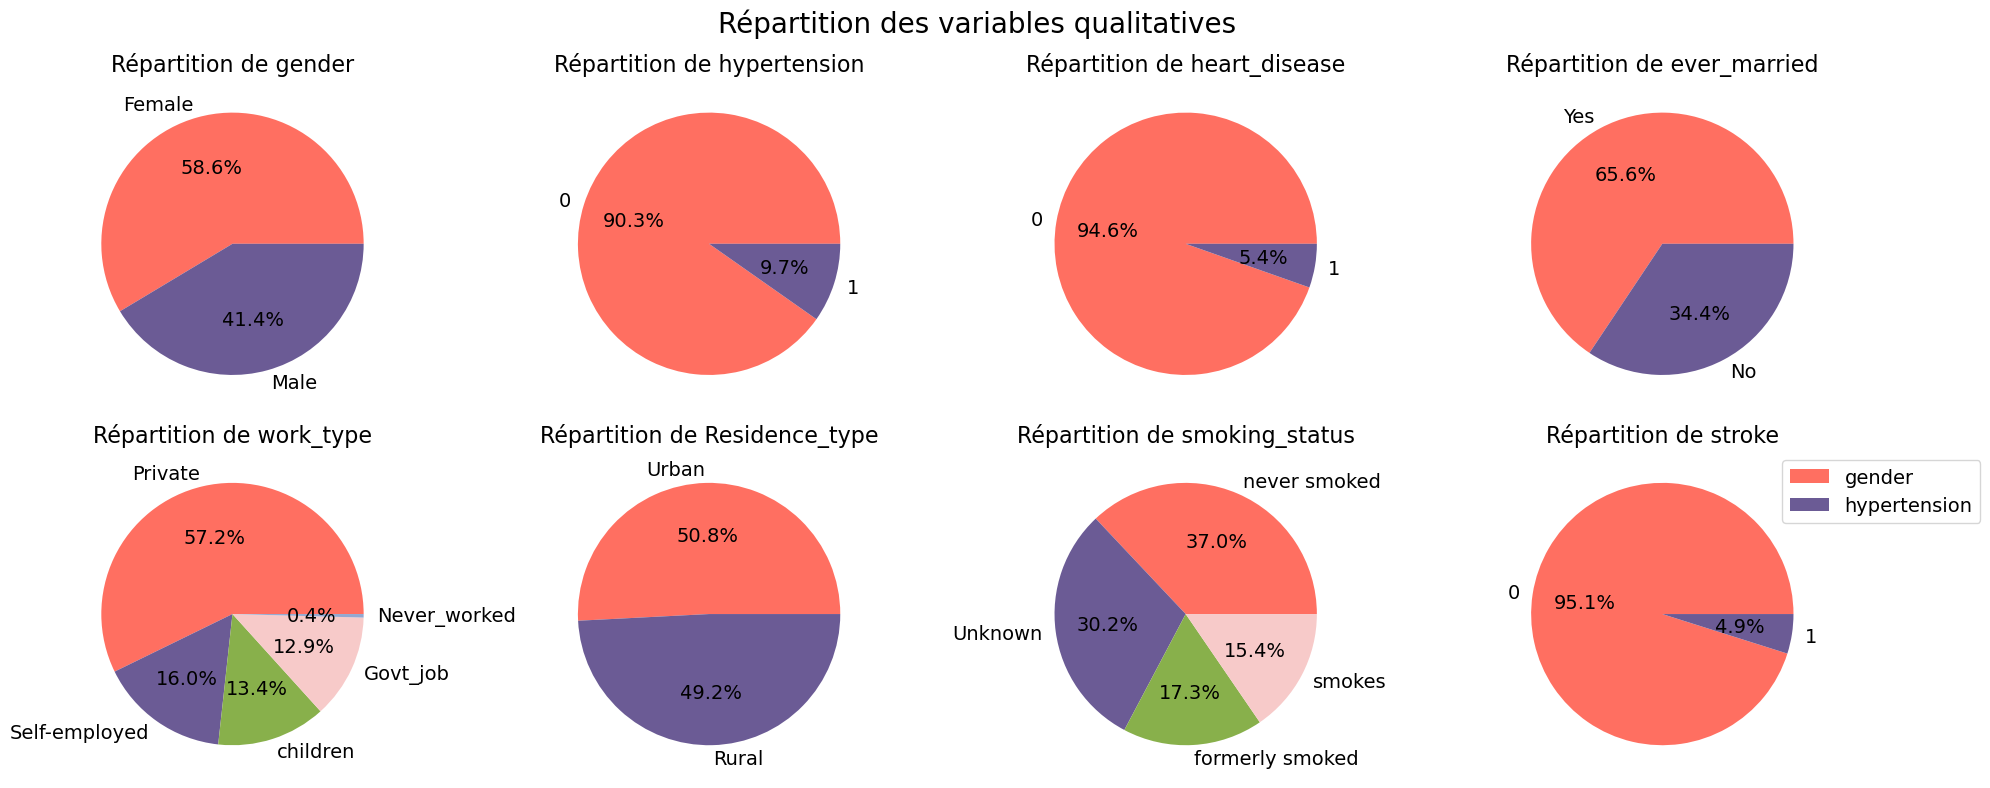

In [35]:
# Liste des variables qualitatives
variables_qualitatives = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7', '#009B77']

# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_per_row = 4  # Quatre graphiques par ligne
num_rows = (num_total_variables + num_graphs_per_row - 1) // num_graphs_per_row

# Définir la taille de la figure
figsize_width = 20  # Largeur de la figure
figsize_height = num_rows * 4  # Hauteur de la figure, ajustée en fonction du nombre de lignes

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_graphs_per_row, figsize=(figsize_width, figsize_height))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en camembert
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors)):
    # Comptage des occurrences de chaque catégorie
    counts = df[variable].value_counts()
    row = i // num_graphs_per_row
    col = i % num_graphs_per_row

    # Diagramme en camembert
    ax = axes[row, col]
    ax.pie(counts, labels=counts.index, colors=colors[:len(counts)], autopct='%1.1f%%', textprops={'fontsize': 14})
    ax.set_title(f'Répartition de {variable}', fontsize=16)
    ax.set_ylabel('', fontsize=14)

# Ajouter et changer la taille de la police de la légende
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), labels=variables_qualitatives, prop={'size': 14})

# Agrandir la police du titre de la figure
plt.suptitle('Répartition des variables qualitatives', fontsize=20)
plt.tight_layout()
plt.show()

In [36]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne BMI
df_cleaned = df.dropna(subset=['bmi'])
df_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Analyses bivariées pour les variables quantitatives

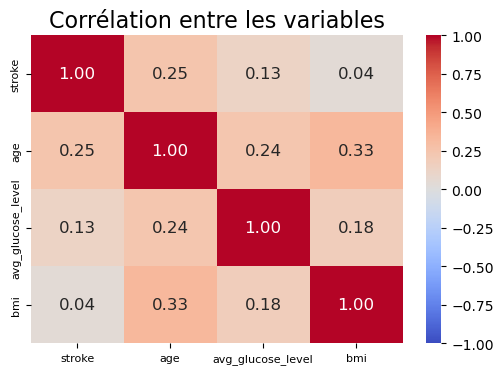

In [19]:
# Sélection des colonnes pertinentes pour le calcul de la corrélation
columns_of_interest = ['stroke', 'age', 'avg_glucose_level', 'bmi']
correlation_df = df[columns_of_interest]

# Calcul de la matrice de corrélation
correlation_matrix = correlation_df.corr()

# Tracé du heatmap
plt.figure(figsize=(6, 4))
heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12},vmin=-1, vmax=1)
plt.title('Corrélation entre les variables', fontsize=16)

# Réduire la taille des noms des colonnes sur les axes x et y
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)
plt.show()

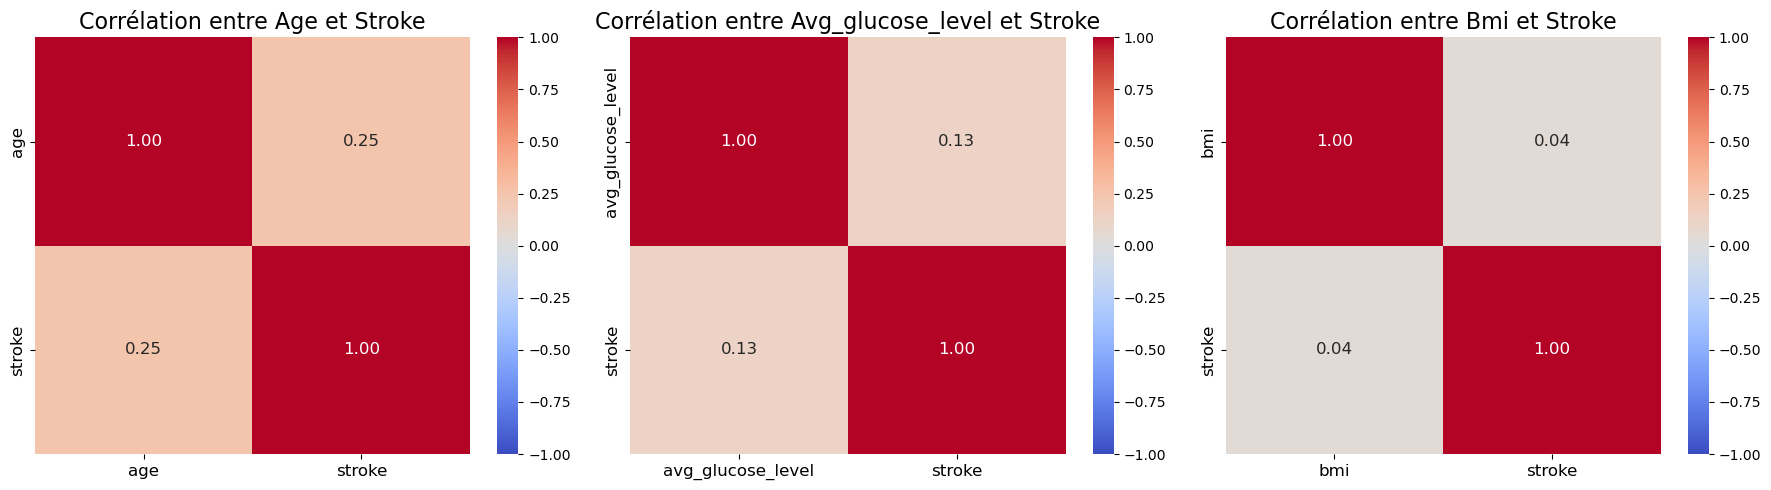

In [20]:
# Sélection des colonnes QUANTITATIVES pour la corrélation avec stroke
quantitative_columns = ['age', 'avg_glucose_level', 'bmi']

# Création d'une figure avec une seule rangée et trois colonnes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tracé des graphiques pour chaque variable quantitative
for i, column in enumerate(quantitative_columns):
    # Calcul de la matrice de corrélation entre la variable quantitative et stroke
    correlation_matrix = df[[column, 'stroke']].corr()
    
    # Tracé du heatmap sur l'axe correspondant
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12}, ax=axes[i],vmin=-1, vmax=1)
    heatmap.set_title(f'Corrélation entre {column.capitalize()} et Stroke', fontsize=16)
    
    # Réduire la taille des noms des colonnes sur les axes x et y
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)

# Ajustement automatique des espaces entre les sous-graphiques
plt.tight_layout()
plt.show()

Iterpretation de la correlation concernant les variables quantitatives:
Corrélation AGE et AVC :
- Plus la valeur de la corrélation est proche de 1 plus les patients âgés ont tendance à avoir un risque plus élevé d'AVC
- La corrélation négative forte(-1, ou proche de -1) indique que les jeunes dans notre cas ont moins de chances d'avoir un AVC.
- La corrélation proche de 0 indique une faible correlation entre l'AGE et l'AVC

Corrélation entre le niveau moyen de glucose et l'AVC :

- La corrélation positive forte montre que les niveaux plus élevés de glucose moyen sont associés à un risque plus élevé d'AVC

Une corrélation négative forte indiquerait le contraire, que des niveaux plus faibles de glucose moyen sont associés à un risque plus élevé d'AVC.
Une corrélation proche de zéro indique une faible corrélation entre le niveau moyen de glucose et l'AVC.
Corrélation entre le BMI (Indice de masse corporelle) et l'AVC :

Une corrélation positive forte indiquerait que des valeurs plus élevées de BMI sont associées à un risque plus élevé d'AVC.
Une corrélation négative forte indiquerait le contraire, que des valeurs plus faibles de BMI sont associées à un risque plus élevé d'AVC.
Une corrélation proche de zéro indique une faible corrélation entre le BMI et l'AVC.
En résumé, un coefficient de corrélation proche de 1 indique une corrélation positive forte, un coefficient proche de -1 indique une corrélation négative forte, et un coefficient proche de zéro indique une faible corrélation. Il est également important de noter que la corrélation ne signifie pas nécessairement une relation de causalité.

#  Analyses bivariées pour les variables qualitatives

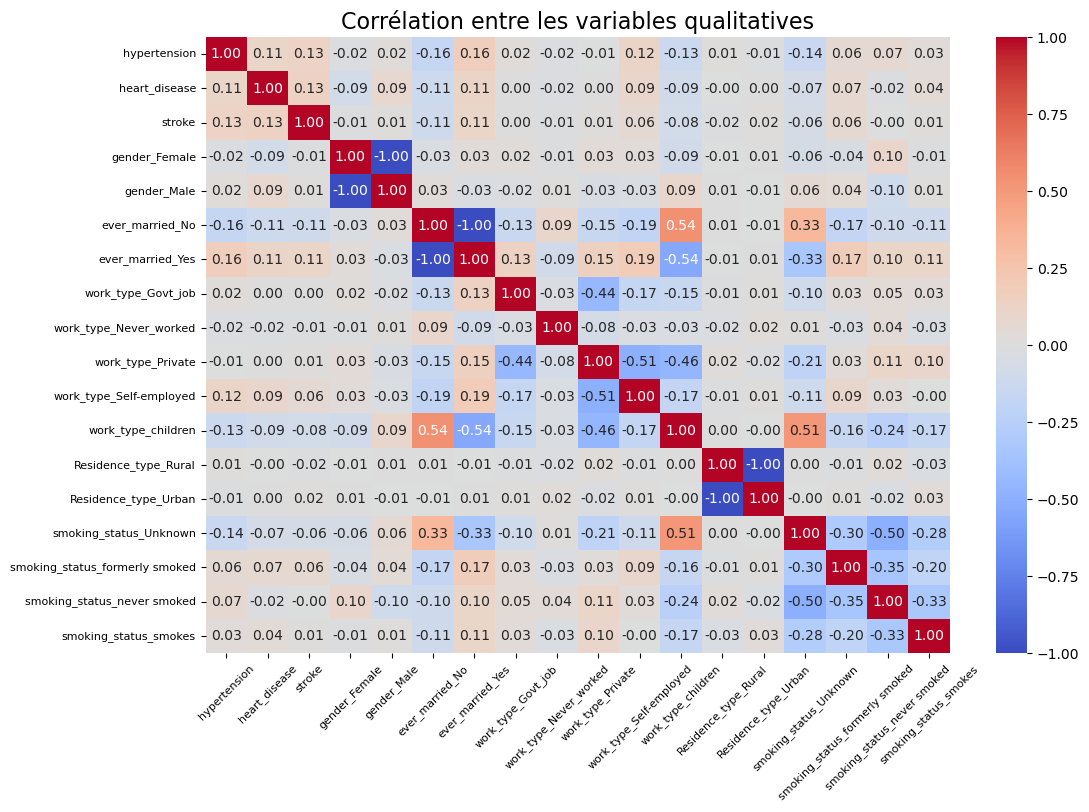

In [21]:
# Sélection des colonnes QUALITATIVES pour le calcul de la corrélation
variables_qualitatives = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
correlation_df = df[variables_qualitatives]

# Convertir les variables qualitatives en variables indicatrices (dummy variables)
correlation_df = pd.get_dummies(correlation_df)

# Calcul de la matrice de corrélation
correlation_matrix = correlation_df.corr()

# Tracé du heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10},vmin=-1, vmax=1)
plt.title('Corrélation entre les variables qualitatives', fontsize=16)

# Réduire la taille des noms des colonnes sur les axes x et y
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)
plt.show()

# Comparaison de l'âge moyen des patients ayant eu un AVC avec ceux qui n'en ont pas eu avec test T

In [22]:
from scipy import stats
# Séparer les données en deux groupes : patients avec AVC et patients sans AVC
avc_group = df[df['stroke'] == 1]['age']
no_avc_group = df[df['stroke'] == 0]['age']

# Calcul de l'âge moyen pour chaque groupe
avc_mean_age = avc_group.mean()
no_avc_mean_age = no_avc_group.mean()

# Effectuer un test t pour évaluer s'il existe une différence significative entre les deux groupes
t_statistic, p_value = stats.ttest_ind(avc_group, no_avc_group)

# Afficher les résultats
print(f"Âge moyen des patients ayant eu un AVC : {avc_mean_age:.2f} ans")
print(f"Âge moyen des patients n'ayant pas eu d'AVC : {no_avc_mean_age:.2f} ans")
print(f"\nTest t-statistique : {t_statistic:.2f}")
print(f"Valeur de p : {p_value:.4f}")

# Interprétation
if p_value < 0.05:
    print("\nIl existe une différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")
else:
    print("\nIl n'existe pas de différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")


Âge moyen des patients ayant eu un AVC : 67.73 ans
Âge moyen des patients n'ayant pas eu d'AVC : 41.97 ans

Test t-statistique : 18.08
Valeur de p : 0.0000

Il existe une différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.


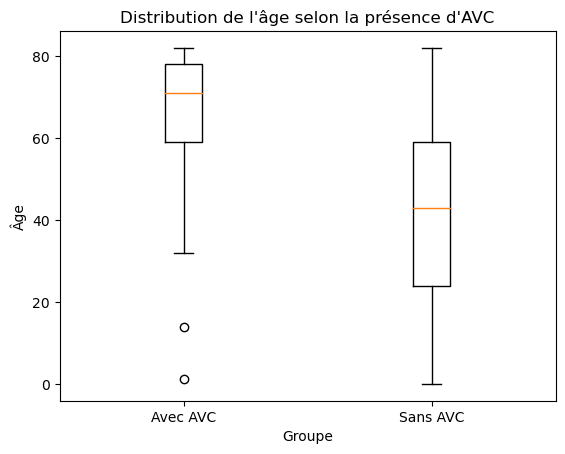

In [23]:
# Données à représenter
data = [avc_group, no_avc_group]

# Création du graphique en boîte
plt.boxplot(data, labels=['Avec AVC', 'Sans AVC'])

# Titres et de légendes
plt.xlabel('Groupe')
plt.ylabel('Âge')
plt.title('Distribution de l\'âge selon la présence d\'AVC')
plt.show()

# Calcul de la prévalence (proportion) de l'hypertension et des maladies cardiaques chez les patients ayant et n'ayant pas eu d'AVC.

In [24]:
# Calculer la prévalence de l'hypertension et des maladies cardiaques pour les patients ayant et n'ayant pas eu d'AVC
hypertension_avc = df[df['stroke'] == 1]['hypertension'].mean()
heart_disease_avc = df[df['stroke'] == 1]['heart_disease'].mean()
hypertension_no_avc = df[df['stroke'] == 0]['hypertension'].mean()
heart_disease_no_avc = df[df['stroke'] == 0]['heart_disease'].mean()

# Afficher les résultats
print("Prévalence de l'hypertension et des maladies cardiaques :")
print(f"\n- Chez les patients ayant eu un AVC :")
print(f"  - Hypertension : {hypertension_avc:.2%}")
print(f"  - Maladie cardiaque : {heart_disease_avc:.2%}")
print(f"\n- Chez les patients n'ayant pas eu d'AVC :")
print(f"  - Hypertension : {hypertension_no_avc:.2%}")
print(f"  - Maladie cardiaque : {heart_disease_no_avc:.2%}")

Prévalence de l'hypertension et des maladies cardiaques :

- Chez les patients ayant eu un AVC :
  - Hypertension : 26.51%
  - Maladie cardiaque : 18.88%

- Chez les patients n'ayant pas eu d'AVC :
  - Hypertension : 8.89%
  - Maladie cardiaque : 4.71%


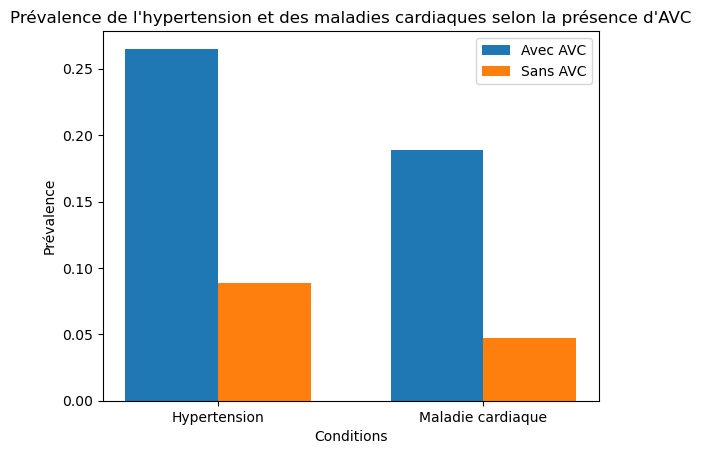

In [25]:
# Données à représenter
categories = ['Hypertension', 'Maladie cardiaque']
avc_data = [hypertension_avc, heart_disease_avc]
no_avc_data = [hypertension_no_avc, heart_disease_no_avc]

# Graphique à barres
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(categories))

bar1 = ax.bar(index, avc_data, bar_width, label='Avec AVC')
bar2 = ax.bar([i + bar_width for i in index], no_avc_data, bar_width, label='Sans AVC')

# Titres et legendes du graphique
ax.set_xlabel('Conditions')
ax.set_ylabel('Prévalence')
ax.set_title('Prévalence de l\'hypertension et des maladies cardiaques selon la présence d\'AVC')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()
plt.show()

# Réalisation du test exact de Fisher pour une comparaison proportionnelle entre deux groupes qui ont des variables binominales (hypertension et maladies cardiaques)

In [26]:
# Données pour le test chez les patients ayant eu un AVC
patients_avc_hypertension = [hypertension_avc * len(df[df['stroke'] == 1]), (1 - hypertension_avc) * len(df[df['stroke'] == 1])]
patients_avc_heart_disease = [heart_disease_avc * len(df[df['stroke'] == 1]), (1 - heart_disease_avc) * len(df[df['stroke'] == 1])]

# Données pour le test chez les patients n'ayant pas eu d'AVC
patients_no_avc_hypertension = [hypertension_no_avc * len(df[df['stroke'] == 0]), (1 - hypertension_no_avc) * len(df[df['stroke'] == 0])]
patients_no_avc_heart_disease = [heart_disease_no_avc * len(df[df['stroke'] == 0]), (1 - heart_disease_no_avc) * len(df[df['stroke'] == 0])]

# Formule pour effectuer le test exact de Fisher pour l'hypertension
odds_ratio_hypertension, p_value_hypertension = fisher_exact([patients_avc_hypertension, patients_no_avc_hypertension])

# Formule pour effectuer le test exact de Fisher pour les maladies cardiaques
odds_ratio_heart_disease, p_value_heart_disease = fisher_exact([patients_avc_heart_disease, patients_no_avc_heart_disease])

# Affichage des résultats
print("Test exact de Fisher pour l'hypertension :")
print(f"  Odds ratio : {odds_ratio_hypertension:.2f}")
print(f"  Valeur p : {p_value_hypertension:.4f}")

print("\nTest exact de Fisher pour les maladies cardiaques :")
print(f"  Odds ratio : {odds_ratio_heart_disease:.2f}")
print(f"  Valeur p : {p_value_heart_disease:.4f}")

# Interprétation des résultats
alpha = 0.05
if p_value_hypertension < alpha:
    print("\nIl existe une différence significative dans la prévalence de l'hypertension entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")
else:
    print("\nIl n'existe pas de différence significative dans la prévalence de l'hypertension entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")

if p_value_heart_disease < alpha:
    print("\nIl existe une différence significative dans la prévalence des maladies cardiaques entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")
else:
    print("Il n'existe pas de différence significative dans la prévalence des maladies cardiaques entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")

Test exact de Fisher pour l'hypertension :
  Odds ratio : 3.70
  Valeur p : 0.0000

Test exact de Fisher pour les maladies cardiaques :
  Odds ratio : 4.71
  Valeur p : 0.0000

Il existe une différence significative dans la prévalence de l'hypertension entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.

Il existe une différence significative dans la prévalence des maladies cardiaques entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.


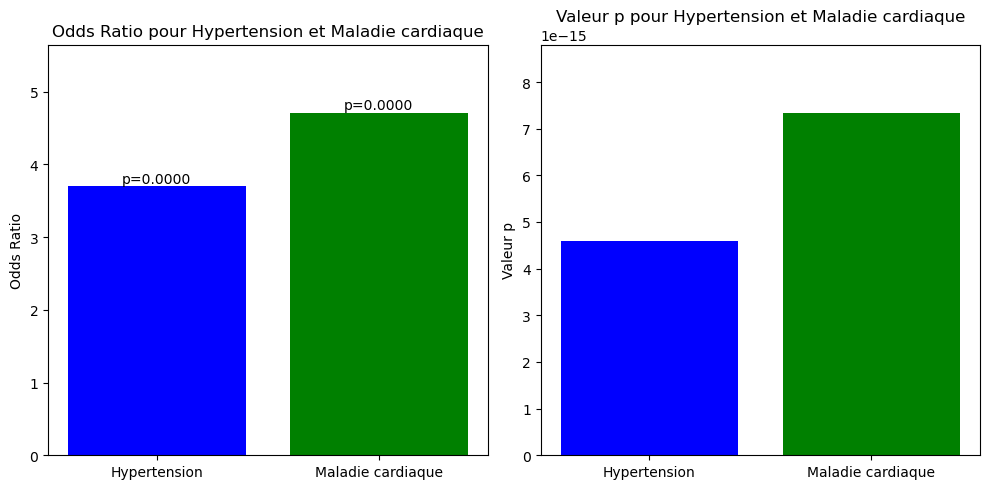

In [27]:
# Données à représenter
conditions = ['Hypertension', 'Maladie cardiaque']
odds_ratios = [odds_ratio_hypertension, odds_ratio_heart_disease]
p_values = [p_value_hypertension, p_value_heart_disease]

# Création du graphique en barres pour les odds ratios
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(conditions, odds_ratios, color=['blue', 'green'])
plt.ylabel('Odds Ratio')
plt.title('Odds Ratio pour Hypertension et Maladie cardiaque')
plt.ylim(0, max(odds_ratios) * 1.2)

# Affichage des valeurs p
for i in range(len(p_values)):
    plt.text(i, odds_ratios[i] + 0.05, f'p={p_values[i]:.4f}', ha='center')

# Création du graphique en barres pour les valeurs p
plt.subplot(1, 2, 2)
plt.bar(conditions, p_values, color=['blue', 'green'])
plt.ylabel('Valeur p')
plt.title('Valeur p pour Hypertension et Maladie cardiaque')
plt.ylim(0, max(p_values) * 1.2)

# Affichage du graphique
plt.tight_layout()
plt.show()


# Test de comparaison avec la variance ANOVA (pas très fiable car utilisé pour comparer 3 groupes ou plus)

In [28]:
from scipy.stats import f_oneway

# Séparation des données en deux groupes : patients avec AVC et patients sans AVC
avc_group = df[df['stroke'] == 1]['bmi'].dropna()  # Exclure les valeurs NaN
no_avc_group = df[df['stroke'] == 0]['bmi'].dropna()  # Exclure les valeurs NaN

# Effectuer un test ANOVA pour évaluer s'il existe une différence significative entre les deux groupes
f_statistic, p_value = f_oneway(avc_group, no_avc_group)

print(f"Test ANOVA - Valeur F : {f_statistic:.2f}")
print(f"Valeur de p : {p_value:.4f}")

# Interprétation des résultats
alpha = 0.05
if p_value < alpha:
    print("\nIl existe une différence significative dans le BMI moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")
else:
    print("Il n'existe pas de différence significative dans le BMI moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")


Test ANOVA - Valeur F : 8.81
Valeur de p : 0.0030

Il existe une différence significative dans le BMI moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.
